# Business Understanding

sebuah lending company menginginkan suatu solusi untuk dapat mempredisksi credit risk

# Analytical Approach

untuk memecahkan permasalahan tersebut bisa dilakukan pendekatan machine learning klasifikasi dengan mengklasifikasi status peminjaman

# Data Requirement

data dibutuhkan yaitu data-data konsumen yang meminjam kredit

# Data Collection

data didapatkan dari client ID/X Parter yaitu sebuah lending company

# Data Understanding

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv',index_col=0)

C:\Users\USER\AppData\Local\Temp\ipykernel_1072\2939865968.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv',index_col=0)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

untuk penjelasan fitur setiap kolom dapat dilihat dalat spreadsheet [berikut](https://docs.google.com/spreadsheets/d/1iT1JNOBwU4l616_rnJpo0iny7blZvNBs/edit#gid=1666154857)

# Data Preparation

hapus kolom yang memiliki semua nilai NaN

In [5]:
df = df.dropna(axis=1,how="all")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [7]:
display(df.iloc[:,:10].head())
display(df.iloc[:,10:20].head())
display(df.iloc[:,20:30].head())
display(df.iloc[:,30:40].head())
display(df.iloc[:,40:50].head())
display(df.iloc[:,50:].head())

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5


,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc
0,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...
1,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...
2,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN
3,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...
4,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...


,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record
0,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN
1,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN
2,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN
3,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN
4,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN


,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv
0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78
1,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71
2,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65
3,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30
4,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17


,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med
0,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0
1,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0
3,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0
4,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0


,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [8]:
col_to_drop = ['id', 'member_id', 'addr_state', 'url', 'desc', 'title', 'zip_code', 'emp_title', # drop karna unique value
               'next_pymnt_d', 'mths_since_last_major_derog', 'mths_since_last_delinq', 'mths_since_last_record', # drop karena jumlah NaN lebih dari setengahnya
               'pymnt_plan','application_type' # karena fitur imbalance/hanya 1 kelas
              ]
df_n = df.drop(col_to_drop,axis =1)

In [9]:
df_n = df_n.dropna()
len(df_n)

376571

In [10]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376571 entries, 42535 to 466284
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   376571 non-null  int64  
 1   funded_amnt                 376571 non-null  int64  
 2   funded_amnt_inv             376571 non-null  float64
 3   term                        376571 non-null  object 
 4   int_rate                    376571 non-null  float64
 5   installment                 376571 non-null  float64
 6   grade                       376571 non-null  object 
 7   sub_grade                   376571 non-null  object 
 8   emp_length                  376571 non-null  object 
 9   home_ownership              376571 non-null  object 
 10  annual_inc                  376571 non-null  float64
 11  verification_status         376571 non-null  object 
 12  issue_d                     376571 non-null  object 
 13  loan_statu

In [12]:
display(df_n.iloc[:,:10].head())
display(df_n.iloc[:,10:20].head())
display(df_n.iloc[:,20:30].head())
display(df_n.iloc[:,30:40].head())
display(df_n.iloc[:,40:].head())

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership
42535,27050,27050,27050.0,36 months,10.99,885.46,B,B2,10+ years,OWN
42536,9750,9750,9750.0,36 months,13.98,333.14,C,C1,1 year,RENT
42537,12000,12000,12000.0,36 months,6.62,368.45,A,A2,10+ years,MORTGAGE
42538,12000,12000,12000.0,36 months,13.53,407.40,B,B5,10+ years,RENT
42539,15000,15000,15000.0,36 months,8.90,476.30,A,A5,2 years,MORTGAGE


,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc
42535,55000.0,Verified,Dec-13,Current,debt_consolidation,22.87,0.0,Oct-86,0.0,14.0
42536,26000.0,Not Verified,Dec-13,Current,debt_consolidation,25.12,0.0,Jan-07,0.0,12.0
42537,105000.0,Not Verified,Dec-13,Current,debt_consolidation,14.05,0.0,Mar-94,1.0,12.0
42538,40000.0,Source Verified,Dec-13,Fully Paid,debt_consolidation,16.94,0.0,Oct-98,0.0,7.0
42539,63000.0,Not Verified,Dec-13,Current,debt_consolidation,16.51,0.0,Mar-98,0.0,8.0


,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp
42535,0.0,36638,61.2,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10
42536,0.0,7967,52.8,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04
42537,0.0,13168,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38
42538,2.0,5572,68.8,32.0,w,0.00,0.00,13359.77,13359.77,11999.99
42539,0.0,11431,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73


,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq
42535,4219.94,0.0,0.0,0.0,Jan-16,885.46,Dec-15,0.0,1,0.0
42536,1955.79,0.0,0.0,0.0,Jan-16,333.14,Jan-16,0.0,1,0.0
42537,1109.42,0.0,0.0,0.0,Jan-16,368.45,Jan-16,0.0,1,0.0
42538,1359.78,0.0,0.0,0.0,Sep-15,119.17,Jan-16,0.0,1,0.0
42539,1880.47,0.0,0.0,0.0,Jan-16,476.30,Jan-16,0.0,1,0.0


,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,0.0,114834.0,59900.0
42536,0.0,14123.0,15100.0
42537,0.0,267646.0,61100.0
42538,15386.0,13605.0,8100.0
42539,1514.0,272492.0,15400.0


In [13]:
# term to int
df_n['term'] = df_n['term'].apply(lambda x: int(x.split()[0]))

In [17]:
# 'grade','sub_grade' to int
col_grade = ['grade','sub_grade']
for col in col_grade:
    grade_map = {}
    sorted_grade = (sorted(df_n[col].unique()))
    for i in range(len(sorted_grade)):
        grade_map[sorted_grade[i]] = i+1
    df_n[col] = df_n[col].map(grade_map)

In [18]:
# date to int
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for col in col_date:
    df_n[col+'_mth'] = df_n[col].apply(lambda x: pd.to_datetime(x.split('-')[0], format='%b').month)
    df_n[col+'_yr'] = df_n[col].apply(lambda x: pd.to_datetime(x.split('-')[1], format='%y').year)
    df_n.drop(col,axis=1,inplace = True)

In [22]:
# emp_length to int
emp_map = {'10+ years':10, '1 year':1, '2 years':2, '4 years':4, '3 years':3, '7 years':7,
       '5 years':5, '6 years':6, '9 years':9, '8 years':8, '< 1 year':0}
df_n['emp_length'] = df_n['emp_length'].map(emp_map)

In [34]:
# term to int
df_n['initial_list_status'] = df_n['initial_list_status'].apply(lambda x: 0 if x == 'f' else 1)

In [40]:
# loan_status to int
df_n['loan_status'] = df_n['loan_status'].apply(lambda x: 2 if x == 'Fully Paid' else 1 if x == 'Current' else 0)

In [48]:
df_n['loan_status'].value_counts()

1    208934
2    126102
0     41535
Name: loan_status, dtype: int64

In [42]:
df_new = pd.get_dummies(df_n,drop_first=True)

In [46]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376571 entries, 42535 to 466284
Data columns (total 63 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            376571 non-null  int64  
 1   funded_amnt                          376571 non-null  int64  
 2   funded_amnt_inv                      376571 non-null  float64
 3   term                                 376571 non-null  int64  
 4   int_rate                             376571 non-null  float64
 5   installment                          376571 non-null  float64
 6   grade                                376571 non-null  int64  
 7   sub_grade                            376571 non-null  int64  
 8   emp_length                           376571 non-null  int64  
 9   annual_inc                           376571 non-null  float64
 10  loan_status                          376571 non-null  int64  
 11  dti      

# EDA

# Modeling

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [47]:
x = df_new.drop('loan_status',axis=1)
y = df_new.loan_status

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 5).fit(x_train, y_train)
y_pred = dtree_model.predict(x_test)
cm_dt = confusion_matrix(y_test, y_pred)

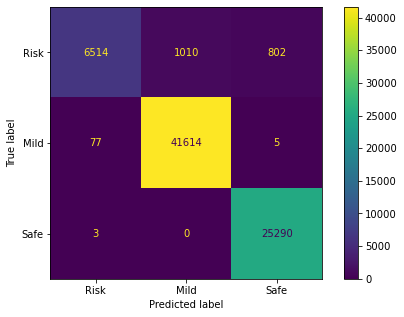

In [63]:
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    cm_dt,
    display_labels=["Risk", "Mild", "Safe"],
)

cmp.plot(ax=ax)
plt.show();

In [101]:
labels = [0, 1, 2]
ytest = label_binarize(y_test, classes=labels)
ypred = label_binarize(y_pred, classes=labels)

In [103]:
auc = roc_auc_score(ypred, ytest, multi_class='ovo',average='weighted')
print('auc score: ',auc)

auc score:  0.9855316125706791


# Evaluation

In [115]:
myscore = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
scores = cross_validate(dtree_model, x, y, cv=5, scoring = myscore)
print(scores['test_score'])
print("mean AUC score = %0.2f " % (scores['test_score'].mean()))
print("standard deviasi = %0.4f " % (scores['test_score'].std()))

[0.98961261 0.97361952 0.98035156 0.98746557 0.98787935]
mean AUC score = 0.98 
standard deviasi = 0.0060 


# Deployment

In [116]:
import pickle
with open('crp_dt.pkl','wb') as file:
    pickle.dump(scores,file)